# Analysing insights about emergency and eletives surgerys

This .csv has many columns in your structure. Then, we can pick only few columns in this archive

* Column 3 - Estabelecimento
* Column 6 - Municipio do estabelecimento
* Column 7 - Complexidade do Procedimento
* Column 8 - Carater da internaca/ATENDIMENTO
* Column 12 - Sub grupo procedimento realizado	
* Column 14 - Procedimento realizado

In [30]:
import pandas as pd
%matplotlib inline

df = pd.read_csv('./assets/SIH_JAN_2017_CIRURGIAS_ELETIVA_E_EMERGENCIA.csv', sep=';', encoding = 'ISO-8859-1'
                , usecols=[3,6,7,8,12,14])

# Modifying columns name in order
df.columns = ['Hospital','Municipio','Complexidade','Carater','Sub Grupo','Procedimento']

df.head()

,Hospital,Municipio,Complexidade,Carater,Sub Grupo,Procedimento
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
3,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,HERNIOPLASTIA UMBILICAL
4,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,RESSECCAO DE TUMOR DE PARTES MOLES EM ONCOLOGIA


## Columns Data type in CSV

In [8]:
df.dtypes

Hospital        object
Municipio       object
Complexidade    object
Carater         object
Sub Grupo       object
Procedimento    object
dtype: object

## Insights of values

In [9]:
# Show columns insights
df.describe()

,Hospital,Municipio,Complexidade,Carater,Sub Grupo,Procedimento
count,4862,4862,4862,4862,4862,4862
unique,16,11,2,4,16,495
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
freq,735,1923,4353,3794,1539,1060


**What happened in table above?** So, we have somes insights about:
* Amount registers in each column (`count`)
* Amount uniques values present in all columns (`unique`)
* Value name with more present in relation of others table rows (`top`)
* Numeric frequence in relation of top value (`freq`)

**Listing unique rows values per column with method `.unique()`**

Example: Municipio (BRASILIA, DF, BR; NATAL, RN, BR; EXTREMOZ, RN, BR; etc.), Hospital (HOSPITAL DA CRIANCA DE BRASILIA JOSE A..,  HOSPITAL DE BASE DO DISTRITO FEDERAL, etc.)


In [10]:
df['Hospital'].unique()

array(['6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB',
       '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL',
       '0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA', '0010545 HRBZ',
       '0010480 HOSPITAL REGIONAL DE CEILANDIA',
       '3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL',
       '0010472 HRG', '0010510 HOSPITAL UNIVERSITARIO DE BRASILIA',
       '0010529 HRPL',
       '0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB',
       '3055450 CBV CENTRO BRASILEIRO DA VISAO',
       '2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA', '0010502 HRS',
       '5717515 HRSM', '2645157 HRPA', '0010464 HRAN'], dtype=object)

In [11]:
df['Municipio'].unique()

array(['BRASILIA, DF, BR ', 'TAGUATINGA, DF, BR ', 'BRAZLANDIA, DF, BR ',
       'CEILANDIA, DF, BR ', 'CRUZEIRO, DF, BR ', 'GAMA, DF, BR ',
       'PLANALTINA, DF, BR ', 'SAMAMBAIA, DF, BR ', 'SOBRADINHO, DF, BR ',
       'SANTA MARIA, DF, BR ', 'PARANOA, DF, BR '], dtype=object)

## Questions

**1. Surgerys amount in each Hospitals?**

In [12]:
df['Hospital'].value_counts()

0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL           735
0010472 HRG                                                 555
0010480 HOSPITAL REGIONAL DE CEILANDIA                      461
0010464 HRAN                                                432
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA                 373
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA                  350
2645157 HRPA                                                327
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB          298
5717515 HRSM                                                281
0010529 HRPL                                                256
0010502 HRS                                                 225
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA                195
3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL        191
0010545 HRBZ                                                 75
6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB     74
3055450 CBV CENTRO BRASILEIRO DA VISAO  

**2. Surgerys amount in each Sub groups?**

In [15]:
subg = df['Sub Grupo']
subg.value_counts()

Sub Grupo: 11 - Cirurgia obstétrica                                                   1539
Sub Grupo: 07 - Cirurgia do aparelho digestivo, orgãos anexos e parede abdominal       893
Sub Grupo: 08 - Cirurgia do sistema osteomuscular                                      651
Sub Grupo: 09 - Cirurgia do aparelho geniturinário                                     474
Sub Grupo: 06 - Cirurgia do aparelho circulatório                                      299
Sub Grupo: 15 - Outras cirurgias                                                       223
Sub Grupo: 04 - Cirurgia das vias aéreas superiores, da cabeça e do pescoço            145
Sub Grupo: 03 - Cirurgia do sistema nervoso central e periférico                       141
Sub Grupo: 16 - Cirurgia em oncologia                                                  110
Sub Grupo: 05 - Cirurgia do aparelho da visão                                           98
Sub Grupo: 12 - Cirurgia torácica                                                       92

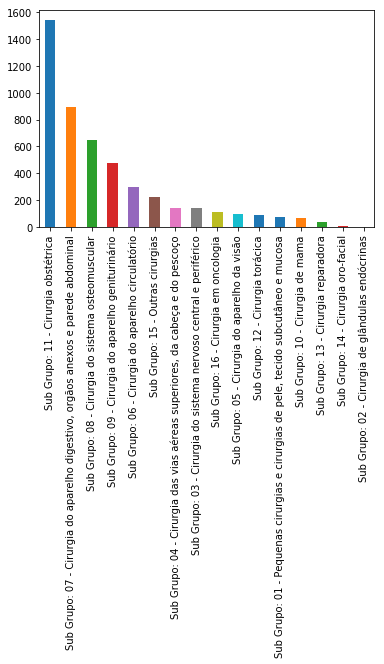

In [16]:
subg.value_counts().plot.bar()

**4. Choose one hospital category and just do dataframe about he**

In [6]:
# In main data frame, request the column 'Hospital' and return all data about this condition
df_hospital = df[df['Hospital'] == '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL']

# Show the 3 first results
df_hospital.head(3)

,Hospital,Municipio,Complexidade,Carater,Sub Grupo,Procedimento
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
4,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,RESSECCAO DE TUMOR DE PARTES MOLES EM ONCOLOGIA


**5. Show 5 rows shuffle of dataframe**

In [17]:
df.sample(5)

,Hospital,Municipio,Complexidade,Carater,Sub Grupo,Procedimento
2874,0010480 HOSPITAL REGIONAL DE CEILANDIA,"CEILANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE FRATURA DE EXTREMIDADE...
3112,0010529 HRPL,"PLANALTINA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
1795,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE FRATURA BIMALEOLAR / T...
3301,0010510 HOSPITAL UNIVERSITARIO DE BRASILIA,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,COLECISTECTOMIA VIDEOLAPAROSCOPICA
752,0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA ...,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,LAPAROTOMIA EXPLORADORA


**6. Choose one hospital category and just do dataframe about he. After, get the amount surgerys makes in this hospital.**

In [42]:
# Get hospital by condition
df_hospital = df[ df['Hospital'] == '0010529 HRPL' ]

# Get data frame surgerys (Procedimento) ocurrences about Hospital 0010529 HRPL
df_hospital['Procedimento'].head()

302         HERNIOPLASTIA INGUINAL / CRURAL (UNILATERAL)
303    TRATAMENTO CIRURGICO DE SINDROME COMPRESSIVA E...
309                                      PARTO CESARIANO
310    ESVAZIAMENTO DE UTERO POS-ABORTO POR ASPIRACAO...
311                                      PARTO CESARIANO
Name: Procedimento, dtype: object

In [29]:
# Returning amount surgerys ocurrences
df_hospital['Procedimento'].value_counts()

PARTO CESARIANO                                                                                    79
APENDICECTOMIA                                                                                     22
ESVAZIAMENTO DE UTERO POS-ABORTO POR ASPIRACAO MANUAL INTRA-UTERINA (AMIU)                         18
CURETAGEM POS-ABORTAMENTO / PUERPERAL                                                              13
TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA                                                          11
TENOMIORRAFIA                                                                                       9
TRATAMENTO C/ CIRURGIAS MULTIPLAS                                                                   7
PARTO CESARIANO C/ LAQUEADURA TUBARIA                                                               5
LAPAROTOMIA EXPLORADORA                                                                             5
AMPUTAÇÃO / DESARTICULAÇÃO DE DEDO                                                

**7. Choose one hospital category and just do dataframe about he. After, get the amount surgery makes in this Hospital (if surgery name equal string "COLECISTECTOMIA").**

In [46]:
surgery = df_hospital[ df_hospital['Procedimento'].str.contains('COLECISTECTOMIA')]
surgery.head()

,Hospital,Municipio,Complexidade,Carater,Sub Grupo,Procedimento
365,0010529 HRPL,"PLANALTINA, DF, BR",Média complexidade,Urgência,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,COLECISTECTOMIA


In [45]:
surgery['Procedimento'].value_counts()

COLECISTECTOMIA    1
Name: Procedimento, dtype: int64

**8. Choose one surgery category and verify ranking hospitals that more do this surgery**

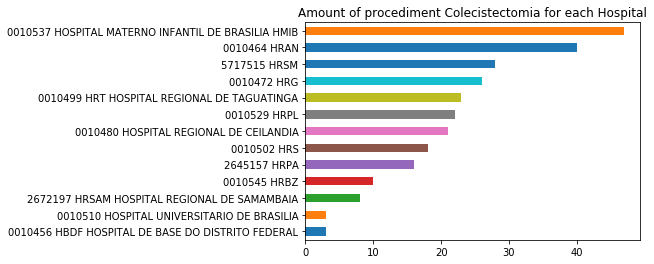

In [42]:
df_apendicectomia = df[ df['Procedimento'].str.contains('APENDICECTOMIA') ]   
hospitals = df_apendicectomia['Hospital']
hospitals.value_counts(ascending=True).plot.barh(title="Amount of procediment Colecistectomia for each Hospital")